# Lab 2: Logistic Regression 

## Step 1: Import libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

## Step 2: Load in and inspect data

* load data from csv format into a pandas dataframe
* checking for all required columns 
* display headings from dataset
* check dataset structure, account of all rows and columns 
* check for duplicates
* check for missing values (na)

In [71]:
# Data is publicly available on kaggle at the following link
# https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
# Data should be included with zip file

# Load the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')

# All required columns per the csv file
required_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Checking that all columns are accounted for and using a conditional statement to ensure columns are included
missing_columns = [col for col in required_columns if col not in data.columns]

# Conditional test for the logistic regression model
if not missing_columns:
    print("All required columns are present!")
    print("\n")
else:
    print(f"Missing columns: {', '.join(missing_columns)}")
    print("\n")
    breakpoint

# Print the first 5 rows
print(data.head())
print("\n")

# Printing out the dimensions of dataframe
print("The dataframe has", data.shape[0], "rows and", data.shape[1], "columns")
print("\n")

# Scanning for duplicates
print("Number of duplicates: ",data.duplicated().sum())
print("\n")

# Checking for any missing values present in dataset
print("Number of missing values for each feature column: \n", data.isna().sum())
print("\n")

#           Results per inspection test

# Duplicates within the data represent 3.85% of all data and is considered negligible
# There isn't any missing values from each data column



All required columns are present!


   gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              1           never  25.19  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


The dataframe has 100000 rows and 9 columns


Number of duplicates:  3854


Number of missing values for each feature column: 
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history    

## Step 3: Data preparation

### Step 3.1: Handle any missing or duplicate values

* Handle any missing values
* Handle any duplicate values to avoid bias. Duplicate rows can introduce bias into the model. Overrepresented due to duplication results in the model giving undue importance to the patterns in those rows, reducing its generalization capability.

### Step 3.2: Ensuring that all other columns in the dataset have numerical values

* Identify non-numeric columns
* Removing any rows with missing values
* Convert the non-numeric columns into numeric values
* apply one-hot encoding to categorical features 
 
### Step 3.3: Verification

* After the conversion, checking if there are any non-numeric columns remaining
* Handling NaN values
* Double-check for any NaN values left

In [59]:
# Handling duplicate data
data = data.drop_duplicates()
print("Number of duplicates: ",data.duplicated().sum())
print("\n")

# Check for any missing data
missing_values = data.isnull().sum().sum()
if missing_values > 0:
    print(f"Warning: There are {missing_values} missing values in the dataset.")
    print("\n")
else:
    print("No missing values in dataset")
    print("\n")

# Remove Rows with Missing Values
data.dropna(inplace=True)

# Labelling and displaying any columns that include non-numerical values
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)
print("\n")

# Solution will be to convert the non-numeric columns 

# Convert gender to numerical values
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})


# Given that smoking_history is a categorical column containing values 'Never', 'No Info', 'Current', 'Former')


# Generate dummy columns for the smoking_history column
dummies = pd.get_dummies(data['smoking_history'], prefix='smoking_history', drop_first=True)



# Concatenating the dummy columns to the original data
data = pd.concat([data, dummies], axis=1)

# Need to drop the original smoking_history column
data.drop('smoking_history', axis=1, inplace=True)

# Ensuring there are no non-numeric values remaining
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns after conversion:", non_numeric_columns)
print("\n")

# Scanning for any NaN data points
print(data.isnull().sum())
print('\n')

# Gender is a categorical column
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

# double-check
print("Verifying that there aren't any NaN values : \n")
print(data.isnull().sum())


Number of duplicates:  0


No missing values in dataset


Non-numeric columns: Index(['gender', 'smoking_history'], dtype='object')


Non-numeric columns after conversion: Index(['smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')


gender                         18
age                             0
hypertension                    0
heart_disease                   0
bmi                             0
HbA1c_level                     0
blood_glucose_level             0
diabetes                        0
smoking_history_current         0
smoking_history_ever            0
smoking_history_former          0
smoking_history_never           0
smoking_history_not current     0
dtype: int64


Verifying that there aren't any NaN values : 

gender                         0
age                            0
hypertension                   0
heart_disease                  0
bmi          

## Reflection on data preparation

* The resulting data will have the original smoking_history column replaced by one-hot encoded columns 
* The gender column remains unchanged with its manual label encoding 
* Concatenating the dummies into the original data integrates the newly created binary columns into the dataset 
* Effectively replacing the original categorical column with numeric representations

## Step 4: Data pre-processing

### Step 4.1: Data Integrity

* There are no missing values in the columns of interest


### Step 4.2: Split features and targets

* Selecting the desired columns for training the logistic regression model.
* Spliting the data into training and testing sets

### Step 4.3: Standardizing Data

* Logistic regression is sensitive to the scale of input features, so it's essential to scale the data.

In [60]:
feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history_current','smoking_history_ever', 'smoking_history_former','smoking_history_never', 'smoking_history_not current','bmi', 'HbA1c_level', 'blood_glucose_level']

X = data[feature_columns]
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 5: Training Logistic Regression Model

* assign model to object
* Using transformed data to train the model.

In [61]:
# Create Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Step 6: Evaluating Logistic Regression Model Performance

* Test model accuracy. Result is a ratio of correctly predicted instances to the total instances
* Precision and f1 score 
* Confusion Matrix
* ROC Curve
* Visualize coefficients of logistic regression model

Accuracy: 0.9571 

Confusion Matrix:
 [[17325   184]
 [  641  1080]]


Precision: 0.8544


F1 Score: 0.7236




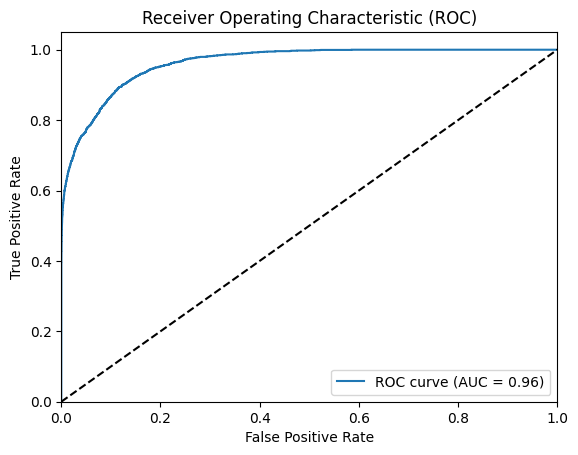

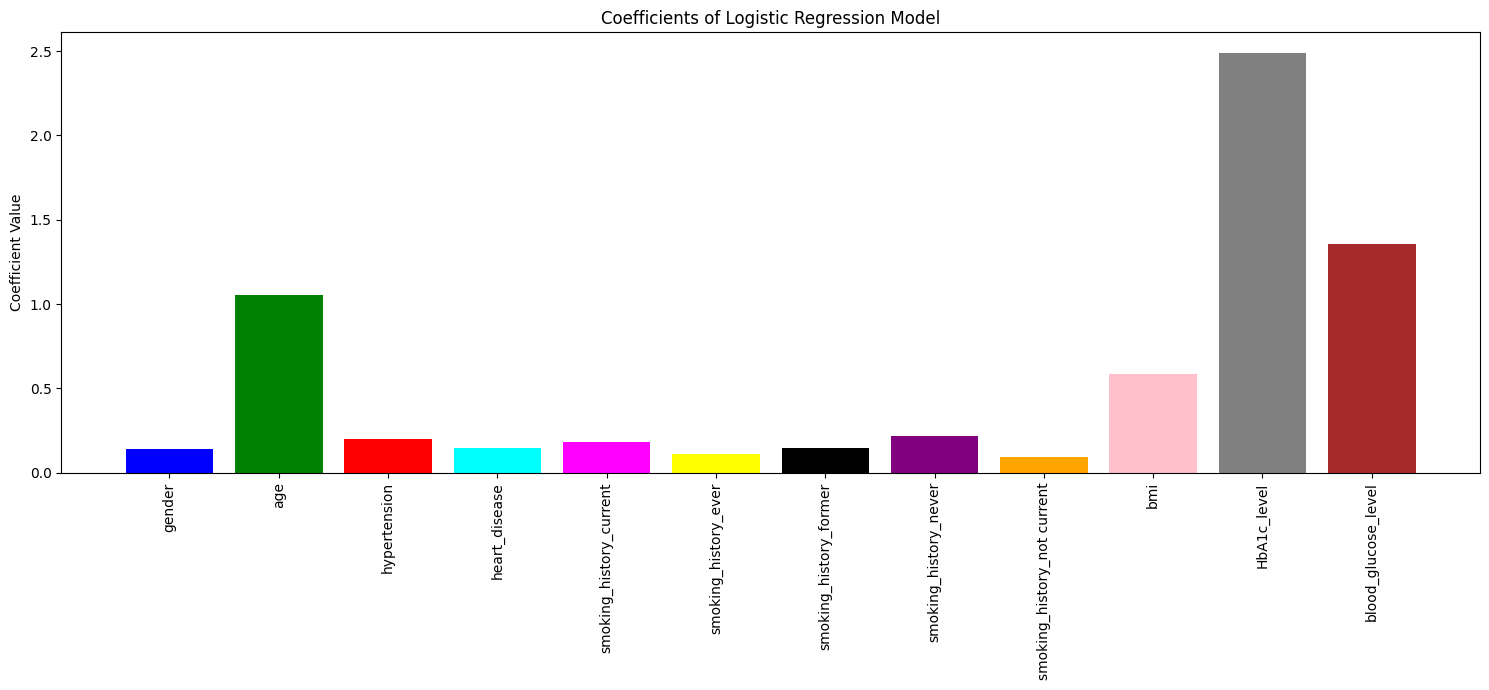

In [70]:
y_pred = classifier.predict(X_test)

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} \n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n")


# Precision and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print("\n")
print(f"F1 Score: {f1:.4f}")
print("\n")

# ROC Curve
y_pred_prob = classifier.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Visualizing the coefficients
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history_current', 'smoking_history_ever','smoking_history_former', 'smoking_history_never', 'smoking_history_not current', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(15, 7))
plt.bar(features, classifier.coef_[0], width=0.6)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink', 'grey', 'brown']
plt.bar(features, classifier.coef_[0], color=colors)
plt.xticks(rotation=90)  
plt.title("Coefficients of Logistic Regression Model")
plt.ylabel("Coefficient Value")
plt.tight_layout()  
plt.show()
